<a href="https://colab.research.google.com/github/Yoonseongjin/python/blob/main/%EA%B8%B0%EC%83%81%EC%B2%AD_%EC%9D%BC%EC%9E%90%EB%A3%8CAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
params ={'serviceKey' : 'ZaVwFFRsweQREQo8+971pc4gigS7yKOotJVXqc5cnBRQAshsPIquWDuCBeHV00+7YjkhC0hv1RGHZ02S3QXi9A==', 'pageNo' : '1', 'numOfRows' : '10', 'dataType' : 'XML', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 'startDt' : '20100101', 'endDt' : '20100601', 'stnIds' : '108' }

response = requests.get(url, params=params)
print(response.content)


b'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><stnId>108</stnId><stnNm>\xec\x84\x9c\xec\x9a\xb8</stnNm><tm>2010-01-01</tm><avgTa>-7.6</avgTa><minTa>-12.7</minTa><minTaHrmt>0654</minTaHrmt><maxTa>-3.6</maxTa><maxTaHrmt>1501</maxTaHrmt><mi10MaxRn></mi10MaxRn><mi10MaxRnHrmt></mi10MaxRnHrmt><hr1MaxRn></hr1MaxRn><hr1MaxRnHrmt></hr1MaxRnHrmt><sumRnDur></sumRnDur><sumRn></sumRn><maxInsWs>7.5</maxInsWs><maxInsWsWd>340</maxInsWsWd><maxInsWsHrmt>0105</maxInsWsHrmt><maxWs>3.4</maxWs><maxWsWd>70</maxWsWd><maxWsHrmt>2350</maxWsHrmt><avgWs>1.9</avgWs><hr24SumRws>1608</hr24SumRws><maxWd>70</maxWd><avgTd>-16.9</avgTd><minRhm>30</minRhm><minRhmHrmt>1137</minRhmHrmt><avgRhm>48.0</avgRhm><avgPv>1.7</avgPv><avgPa>1010.6</avgPa><maxPs>1024.4</maxPs><maxPsHrmt>0005</maxPsHrmt><minPs>1019.4</minPs><minPsHrmt>2356</minPsHrmt><avgPs>1021.7</avgPs><ssDur>9.6</ssDur><sumSsHr>7.3</su

In [ ]:
# Python3 샘플 코드 #

import requests
import pprint
import json

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
params ={'serviceKey' : 'Tu2//oSlQb+BvpEbLpLx2AhROsoRCsEux2wwMce8M5+aznN9vbqz3HNjhXfjkWIdvggQvXy5gefwR5rFaEfH2Q==', 'pageNo' : '1', 'numOfRows' : '10', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 'startDt' : '20100101', 'endDt' : '20100601', 'stnIds' : '108' }

response = requests.get(url, params=params)
##print(response.content)
contents = response.text

#출력 꾸미기
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

#------------------------------------------
#출력딘 문자열 json으로 변환

json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob))

# 필요한 값 받아오기
body = json_ob['response']['body']['items']
print(body)
#------------------------------------------
#body 함수에 저장된 내용 dataframe으로 만들고 
import pandas as pd
from pandas.io.json import json_normalize

dataframe = json_normalize(body)
print(dataframe)

#data 저장

dataframe.to_csv('기상청자료.csv',index=False)

('{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"stnId":"108","stnNm":"서울","tm":"2010-01-01","avgTa":"-7.6","minTa":"-12.7","minTaHrmt":"0654","maxTa":"-3.6","maxTaHrmt":"1501","mi10MaxRn":"","mi10MaxRnHrmt":"","hr1MaxRn":"","hr1MaxRnHrmt":"","sumRnDur":"","sumRn":"","maxInsWs":"7.5","maxInsWsWd":"340","maxInsWsHrmt":"0105","maxWs":"3.4","maxWsWd":"70","maxWsHrmt":"2350","avgWs":"1.9","hr24SumRws":"1608","maxWd":"70","avgTd":"-16.9","minRhm":"30","minRhmHrmt":"1137","avgRhm":"48.0","avgPv":"1.7","avgPa":"1010.6","maxPs":"1024.4","maxPsHrmt":"0005","minPs":"1019.4","minPsHrmt":"2356","avgPs":"1021.7","ssDur":"9.6","sumSsHr":"7.3","hr1MaxIcsrHrmt":"1100","hr1MaxIcsr":"1.51","sumGsr":"8.63","ddMefs":"","ddMefsHrmt":"","ddMes":"2.2","ddMesHrmt":"0000","sumDpthFhsc":"","avgTca":"3.8","avgLmac":"2.3","avgTs":"-4.6","minTg":"-13.0","avgCm5Te":"-3.4","avgCm10Te":"-1.7","avgCm20Te":"-0.7","avgCm30Te":"0.5","avgM05Te":"2.4","av

<ipython-input-3-7f38196a42d8>:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe = json_normalize(body)


#기상청_지상 시간자료시각화

In [ ]:
# Python3 샘플 코드 #

import requests

url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
para ={'serviceKey' : 'ZaVwFFRsweQREQo8+971pc4gigS7yKOotJVXqc5cnBRQAshsPIquWDuCBeHV00+7YjkhC0hv1RGHZ02S3QXi9A==', 'pageNo' : '1', 'numOfRows' : '100', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'HR', 'startDt' : '20100101', 'startHh' : '01', 'endDt' : '20100601', 'endHh' : '01', 'stnIds' : '108' }

res = requests.get(url, params=para)
print(res.content)

b'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"tm":"2010-01-01 01:00","rnum":"1","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"-11.0","taQcflg":"0","rn":"","rnQcflg":"","ws":"1.2","wsQcflg":"0","wd":"290","wdQcflg":"0","hm":"45","hmQcflg":"0","pv":"1.2","td":"-20.6","pa":"1012.5","paQcflg":"0","ps":"1023.8","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"2.2","hr3Fhsc":"","dc10Tca":"","dc10LmcsCa":"","clfmAbbrCd":"","lcsCh":"","vs":"","gndSttCd":"","dmstMtphNo":"","ts":"-6.5","tsQcflg":"0","m005Te":"-4.7","m01Te":"-2.1","m02Te":"-0.6","m03Te":"0.6"},{"tm":"2010-01-01 02:00","rnum":"2","stnId":"108","stnNm":"\xec\x84\x9c\xec\x9a\xb8","ta":"-11.1","taQcflg":"0","rn":"","rnQcflg":"","ws":"1.7","wsQcflg":"0","wd":"20","wdQcflg":"0","hm":"46","hmQcflg":"0","pv":"1.2","td":"-20.4","pa":"1012.5","paQcflg":"0","ps":"1023.8","psQcflg":"0","ss":"","ssQcflg":"9","icsr":"","dsnw":"2.2","hr3Fhsc":"","dc10Tca":"","

# JSON LOAD

In [ ]:
import json
json_file = json.loads(res.text)

In [ ]:
import pandas as pd
from pandas import json_normalize
df = json_normalize(json_file['response']['body']['items']['item'])

In [ ]:
df

,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2010-01-01 01:00,1,108,서울,-11.0,0,,,1.2,0,...,,,,,-6.5,0,-4.7,-2.1,-0.6,0.6
1,2010-01-01 02:00,2,108,서울,-11.1,0,,,1.7,0,...,,,,,-6.5,0,-4.8,-2.1,-0.6,0.6
2,2010-01-01 03:00,3,108,서울,-12.1,0,,,1.6,0,...,,2000,16,,-6.7,0,-4.9,-2.2,-0.7,0.6
3,2010-01-01 04:00,4,108,서울,-12.3,0,,,1.4,0,...,,2000,,,-6.8,0,-5.0,-2.3,-0.7,0.6
4,2010-01-01 05:00,5,108,서울,-12.4,0,,,1.6,0,...,,2000,,,-7.0,0,-5.1,-2.4,-0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010-01-05 00:00,96,108,서울,-8.0,0,,9,2.1,0,...,,1200,,,-0.8,0,-0.7,-0.4,-0.1,0.4
96,2010-01-05 01:00,97,108,서울,-8.4,0,,,3.9,0,...,,,,,-0.8,0,-0.7,-0.4,-0.2,0.4
97,2010-01-05 02:00,98,108,서울,-8.8,0,,,4.1,0,...,,,,,-0.8,0,-0.7,-0.4,-0.1,0.4
98,2010-01-05 03:00,99,108,서울,-9.2,0,,,3.3,0,...,10,1100,19,,-0.8,0,-0.7,-0.4,-0.1,0.4


#한글처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
#한글처리2
from matplotlib import font_manager, rc
font_path ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

#Surface Temperature Data

Text(0.5, 1.0, 'OPEN APL ASOS 온도 데이터')

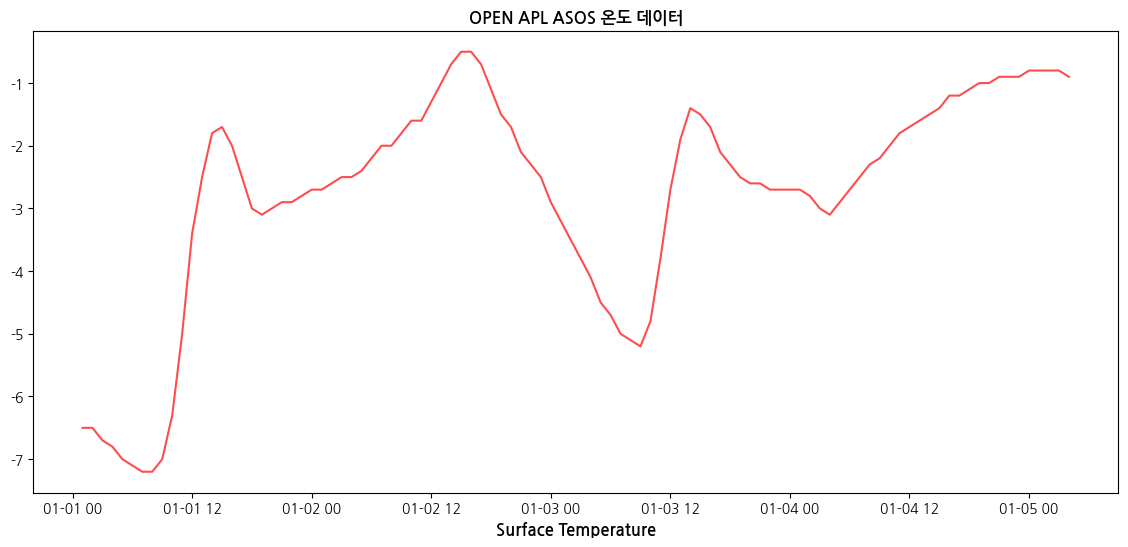

In [ ]:
import matplotlib.pyplot as plt
df['tm'] = pd.to_datetime(df['tm'])                  
df['ts'] = pd.to_numeric(df['ts'],downcast='float')

fig = plt.figure(figsize=(14,6))                             #크기
ax = plt.subplot(1,1,1)
ax.plot(df['tm'], df['ts'], color='r', lw=1.5, alpha=0.7)   #꾸미기

ax.set_xlabel('Date 날짜', fontweight='bold', fontsize=12) 
ax.set_xlabel('Surface Temperature', fontweight='bold', fontsize=12)
ax.set_title('OPEN APL ASOS 온도 데이터', fontweight='bold', fontsize=12)

#Air Temperature

Text(0.5, 1.0, 'OPEN APL Air 온도 데이터')

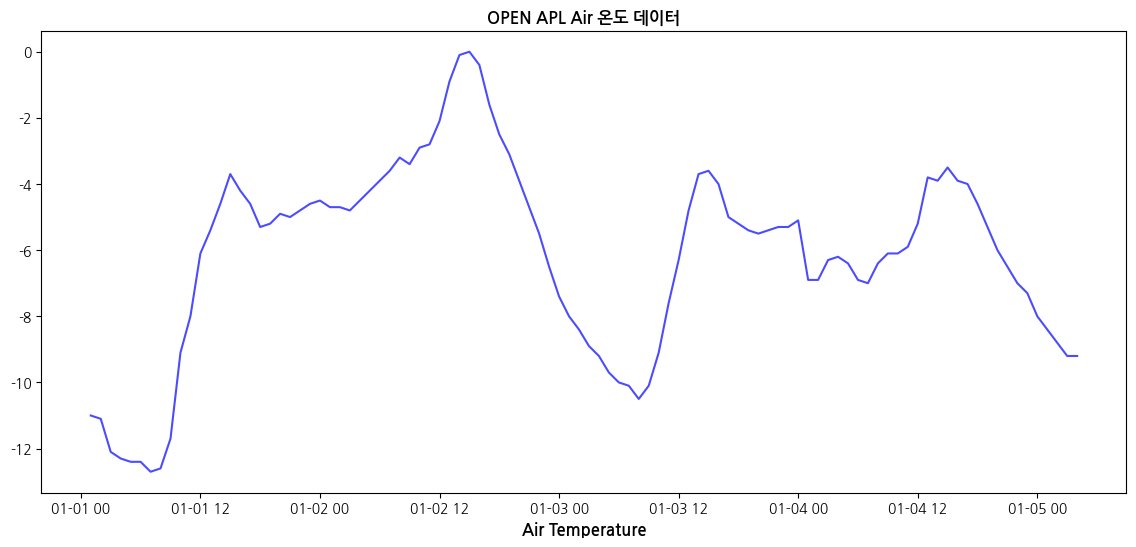

In [ ]:
import matplotlib.pyplot as plt
df['tm'] = pd.to_datetime(df['tm'])                  
df['ta'] = pd.to_numeric(df['ta'],downcast='float')

fig = plt.figure(figsize=(14,6))                             #크기
ax = plt.subplot(1,1,1)
ax.plot(df['tm'], df['ta'], color='b', lw=1.5, alpha=0.7)   #꾸미기

ax.set_xlabel('Date 날짜', fontweight='bold', fontsize=12) 
ax.set_xlabel('Air Temperature', fontweight='bold', fontsize=12)
ax.set_title('OPEN APL Air 온도 데이터', fontweight='bold', fontsize=12)

#비교출력(Surface&Air Temp)

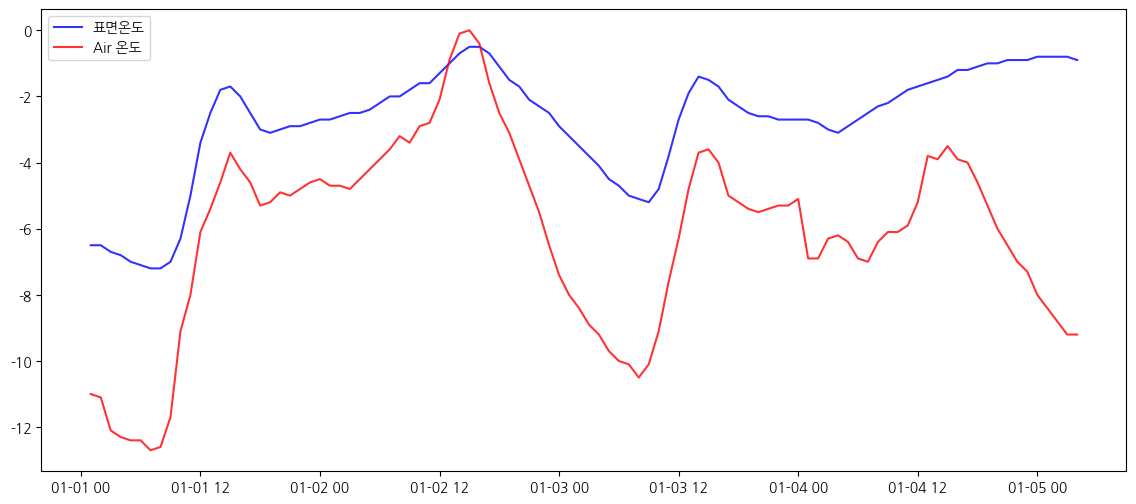

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df['tm'],df['ts'],color='blue', lw=1.5, alpha=0.8, label='표면온도')
ax.plot(df['tm'],df['ta'],color='red', lw=1.5, alpha=0.8, label='Air 온도')
ax.legend()
plt.show()

#data Save

In [ ]:
df.to_excel("output.xlsx")
df.to_csv("output.csv")